In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Prepare the Data

In [2]:
# Load the dataset (already done previously, but we will reload to ensure we're working with the correct data)
df = pd.read_csv('diabetes_data.csv')

# Drop irrelevant columns
df = df.drop(columns=['PatientID', 'DoctorInCharge'])  # Drop columns that aren't useful for modeling

# Handle missing values (simplest approach is to drop them, but you could also impute)
df = df.dropna()

# Select features and target variable
X = df.drop(columns=['Diagnosis'])  # Features (excluding the target column)
y = df['Diagnosis']  # Target variable (assumes 'Diagnosis' indicates Type 1 diabetes, with 1 for positive and 0 for negative)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Train the Random Forest Model


In [3]:
# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Step 4: Make Predictions and Evaluate the Model


In [4]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.91
Confusion Matrix:
[[227   6]
 [ 27 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       233
           1       0.95      0.81      0.88       143

    accuracy                           0.91       376
   macro avg       0.92      0.89      0.90       376
weighted avg       0.92      0.91      0.91       376



Step 5: Visualize the Confusion Matrix


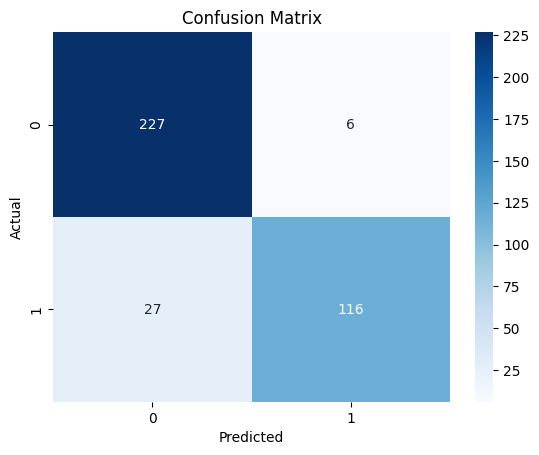

In [5]:
# Plot the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Step 6: Feature Importance


                          Feature  Importance
18              FastingBloodSugar    0.250799
19                          HbA1c    0.245573
9                     DietQuality    0.023805
20                SerumCreatinine    0.023000
40       MedicalCheckupsFrequency    0.022829
5                             BMI    0.022594
41            MedicationAdherence    0.022584
24                 CholesterolHDL    0.022579
16                     SystolicBP    0.022464
25       CholesterolTriglycerides    0.022097
22               CholesterolTotal    0.021992
36             QualityOfLifeScore    0.021338
8                PhysicalActivity    0.021289
42                 HealthLiteracy    0.020664
32                  FatigueLevels    0.020627
10                   SleepQuality    0.020365
21                      BUNLevels    0.020161
23                 CholesterolLDL    0.020068
7              AlcoholConsumption    0.019960
17                    DiastolicBP    0.019730
0                             Age 

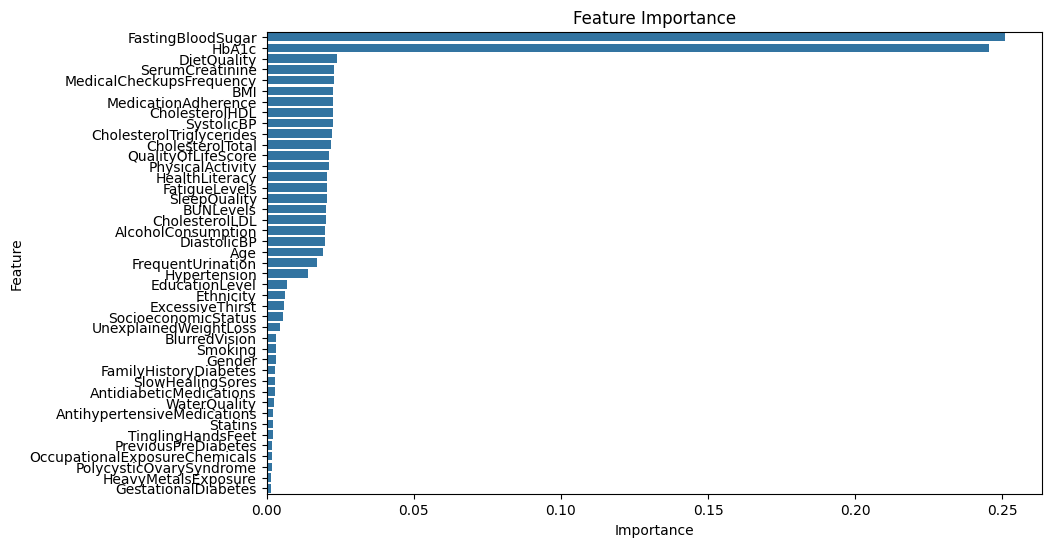

In [6]:
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()


Accuracy: Evaluates how well the model predicts Type 1 diabetes.
Confusion Matrix: Provides insight into the number of true positives, true negatives, false positives, and false negatives.
Classification Report: Shows precision, recall, F1-score, and support for each class.
Feature Importance: Identifies which features are most influential in predicting diabetes.

LOGISTIC REGRESSION MODEL

In [7]:
from sklearn.linear_model import LogisticRegression


Step 2: Prepare the Data

In [8]:

# Load the dataset 
df = pd.read_csv('diabetes_data.csv')

# Drop irrelevant columns
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Handle missing values by dropping 
df = df.dropna()

# Select features and target variable
X = df.drop(columns=['Diagnosis'])  # Features
y = df['Diagnosis']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 3: Train the Logistic Regression Model


In [9]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)


/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Step 4: Make Predictions and Evaluate the Model


In [10]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.82
Confusion Matrix:
[[202  31]
 [ 36 107]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       233
           1       0.78      0.75      0.76       143

    accuracy                           0.82       376
   macro avg       0.81      0.81      0.81       376
weighted avg       0.82      0.82      0.82       376



Step 5: Visualize the Confusion Matrix


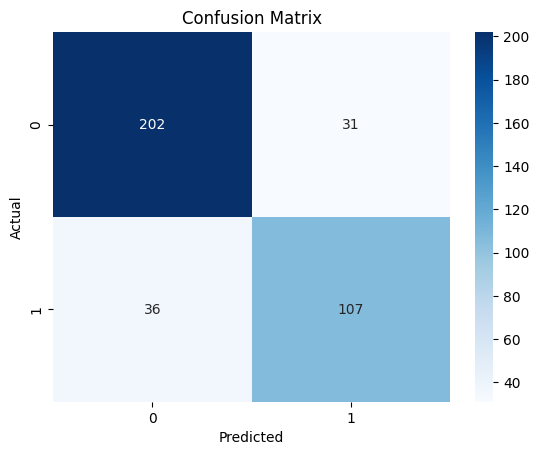

In [11]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Step 2: Train the Decision Tree Model


In [13]:
# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = decision_tree.predict(X_test)


Step 3: Evaluate the Decision Tree Model


In [14]:
# Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Generate confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Generate classification report
class_report_tree = classification_report(y_test, y_pred_tree)

# Output the results
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print("Decision Tree Confusion Matrix:")
print(conf_matrix_tree)
print("Decision Tree Classification Report:")
print(class_report_tree)


Decision Tree Accuracy: 0.87
Decision Tree Confusion Matrix:
[[207  26]
 [ 24 119]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       233
           1       0.82      0.83      0.83       143

    accuracy                           0.87       376
   macro avg       0.86      0.86      0.86       376
weighted avg       0.87      0.87      0.87       376



Step 4: Visualize the Confusion Matrix


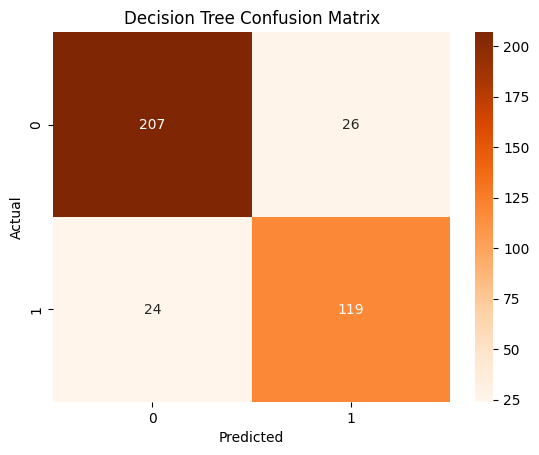

In [15]:
# Visualize the confusion matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


COMPARING ALL 3 MODELS

In [16]:
from sklearn.linear_model import LogisticRegression
#Step 1: Ensure All Models Are Trained and Evaluated

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)


/Users/aaliyahcarrington/Downloads/anaconda3/envs/AI_SMU/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)


In [18]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict and evaluate Decision Tree
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)


Step 2: Compare the Models


In [19]:
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")


Logistic Regression Accuracy: 0.82
Random Forest Accuracy: 0.91
Decision Tree Accuracy: 0.87


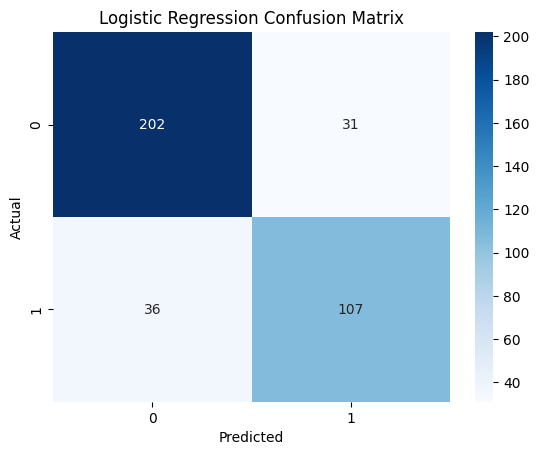

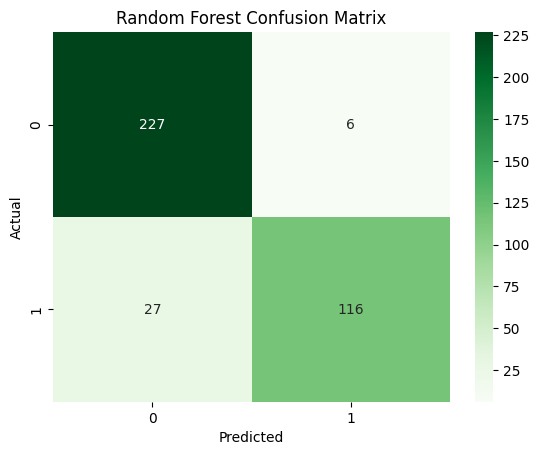

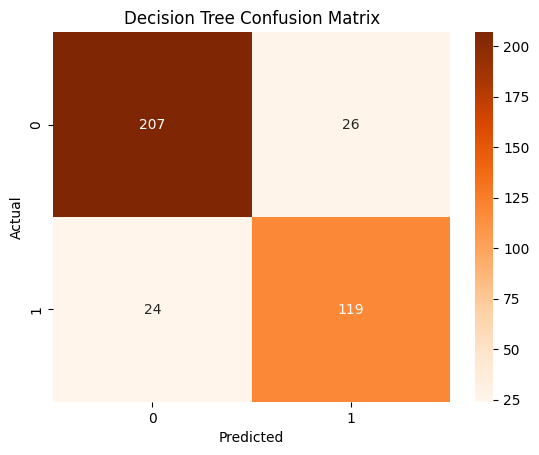

In [20]:
#Visualize confusion matrix for all 3 Models

# Logistic Regression Confusion Matrix
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Confusion Matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Confusion Matrix
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Oranges')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [21]:
print("Logistic Regression Classification Report:")
print(class_report_log_reg)

print("Random Forest Classification Report:")
print(class_report_rf)

print("Decision Tree Classification Report:")
print(class_report_tree)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       233
           1       0.78      0.75      0.76       143

    accuracy                           0.82       376
   macro avg       0.81      0.81      0.81       376
weighted avg       0.82      0.82      0.82       376

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       233
           1       0.95      0.81      0.88       143

    accuracy                           0.91       376
   macro avg       0.92      0.89      0.90       376
weighted avg       0.92      0.91      0.91       376

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       233
           1       0.82      0.83      0.83       143

    accuracy                           0.87       376
   macro av

Step 3: Interpretation


accuracy scores for each model:

Logistic Regression Accuracy: 81.91%
Random Forest Accuracy: 91.22%
Decision Tree Accuracy: 86.70%

Random Forest had the highest accuracy at 91.22%, making it the best performing model among the three.
Decision Tree had an accuracy of 86.70%, which is lower than Random Forest but still quite strong.
Logistic Regression had the lowest accuracy at 81.91%, but it offers interpretability, which might still make it useful depending on your project’s goals.

In [22]:
from catboost import CatBoostClassifier

# Assuming 'model' is your trained CatBoost model
feature_importances = model.get_feature_importance()
feature_names = model.feature_names_

# Combine and sort feature importances
import pandas as pd
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
importance_df.plot(kind='barh', x='Feature', y='Importance', title='Feature Importance')


ModuleNotFoundError: No module named 'catboost'

In [ ]:
!pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 MB 6.0 MB/s eta 0:00:00:00:010:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 6.3 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × Building wheel for catboost (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [40 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      creating build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/monoforest.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/plot_helpers.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/metrics.py -> build/lib.macosx-10.9-x86_64-cpython-39/catboost
      copying catboost/carry.py -> build/lib.macosx